The goal of this notebook is to create a neural network that produces a score >= 88% accuracy on the mnist fashion test dataset and then visualize the model's performance and some predictions.

In [1]:
# Common imports for creating the model and visualizing data and predictions

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Import the dataset

from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# Look at first sample

X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [4]:
y_train[0]

9

In [5]:
# Check shape of sample

X_train[0].shape, y_train[0].shape

((28, 28), ())

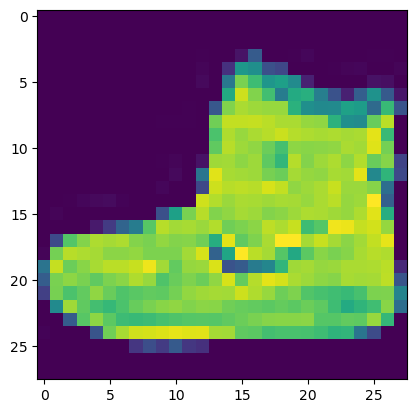

In [6]:
# Plot one sample

plt.imshow(X_train[0])

In [7]:
# Create list of label names to index onto the labels

class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
# Building the first model

# Set random seed for reproducibility

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(X_train, y_train, epochs=20, verbose=0)

In [9]:
model_1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.4001 - accuracy: 0.8680


[0.40008509159088135, 0.8679999709129333]

In [10]:
# Trying to improve the model by scaling the data first
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test_scaled = scaler.transform(X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

In [11]:


model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

lr2_sheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history_2 = model_2.fit(X_train_scaled, y_train, epochs=20, verbose=0)

In [12]:
model_2.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 994us/step - loss: 0.3947 - accuracy: 0.8850


[0.39473289251327515, 0.8849999904632568]

Text(0.5, 1.0, 'Finding ideal learning rate')

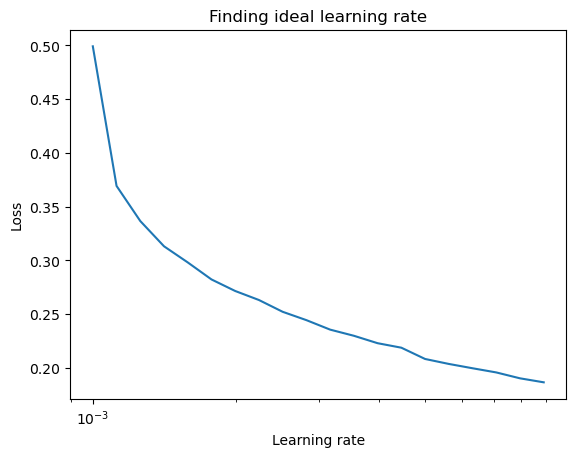

In [13]:
# Plot learning rate decay curve

lrs2 = 1e-3 * (10**(tf.range(20)/20))
plt.semilogx(lrs2, history_2.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding ideal learning rate")

In [14]:
# The ideal learning rate looks to be about 1e-3, which is the default for the Adam optimizer

In [15]:
# Increasing the number of epochs to try to improve the accuracy score



model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(X_train_scaled, y_train, epochs=50, verbose=0)

In [16]:
model_3.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.6170 - accuracy: 0.8880


[0.617038905620575, 0.8880000114440918]

In [17]:
# Adding another layer to try to boost accuracy



model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_4 = model_4.fit(X_train_scaled, y_train, epochs=50, verbose=0)

In [18]:
model_4.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.5181 - accuracy: 0.8917


[0.5181389451026917, 0.891700029373169]

<Axes: >

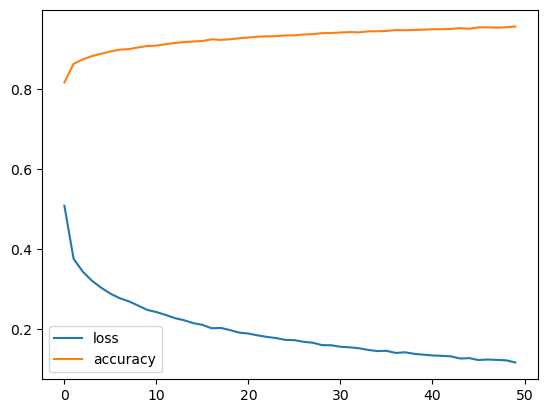

In [35]:
# Plotting loss and accuracy curves for the best model (model_4)

pd.DataFrame(history_4.history).plot()

In [20]:
# Model 4 has been the best, so I will use that one for the visualizations

In [21]:
# Function to plot confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):



  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize confusion matrix
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  # Create matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes


  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])


  # Label axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()


  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # Plot text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [36]:
# Get prediction probailities and convert to integers

y_probs = model_4.predict(X_test_scaled)
y_preds = y_probs.argmax(axis=1) 

313/313 [==============================] - 0s 940us/step


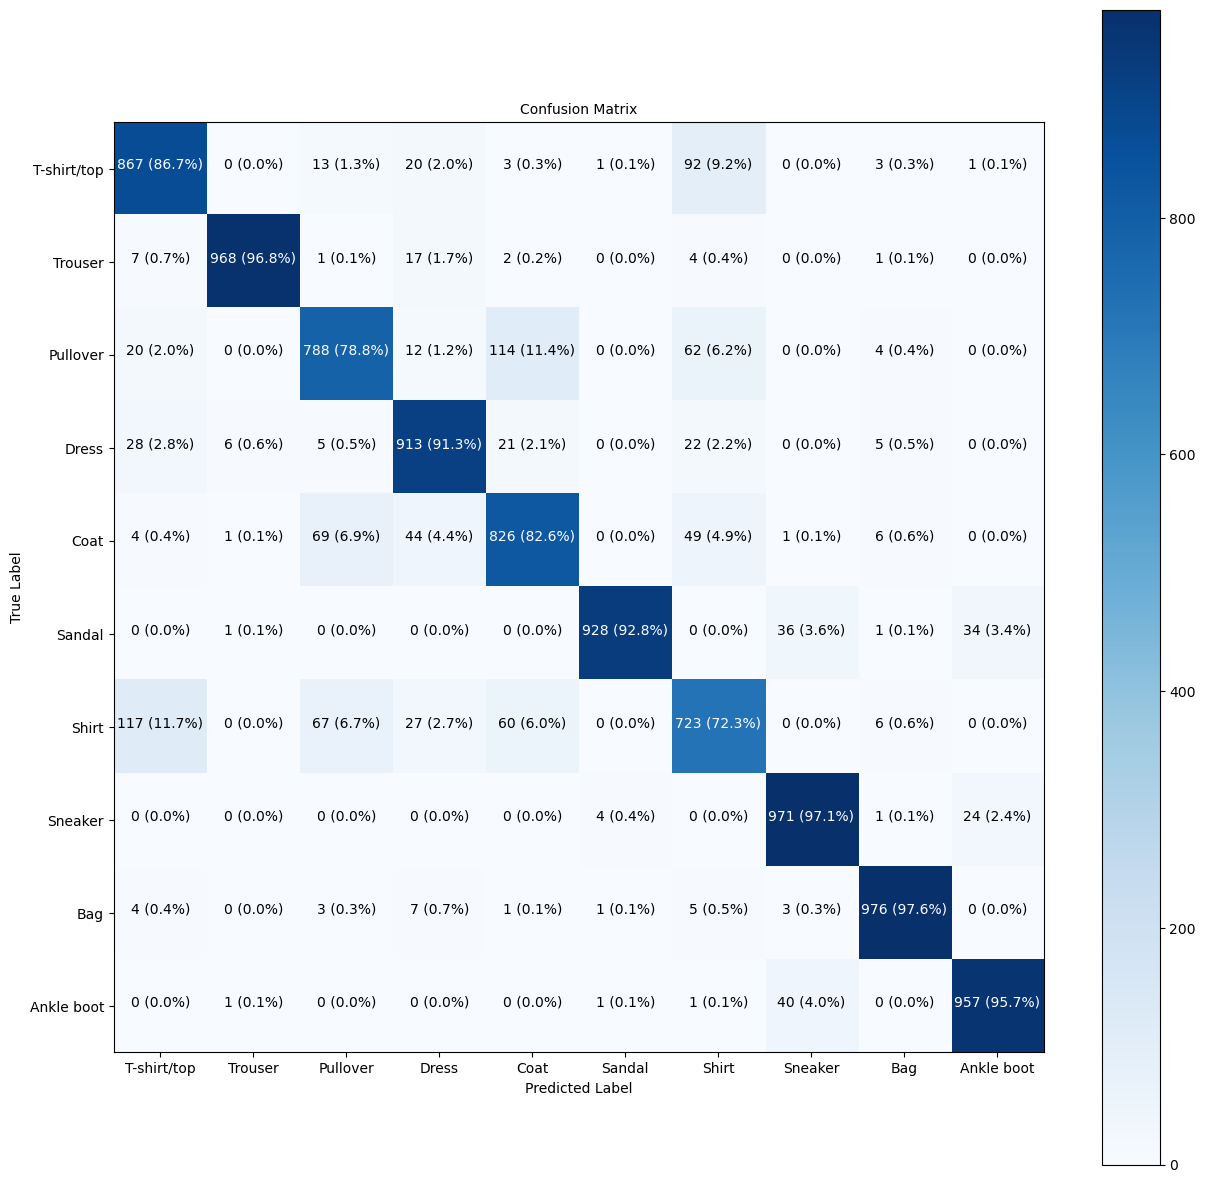

In [37]:
# Show confusion matrix

plot_confusion_matrix(y_true=y_test, y_pred=y_preds, classes=class_names, figsize=(15,15), text_size=10)

313/313 [==============================] - 0s 851us/step


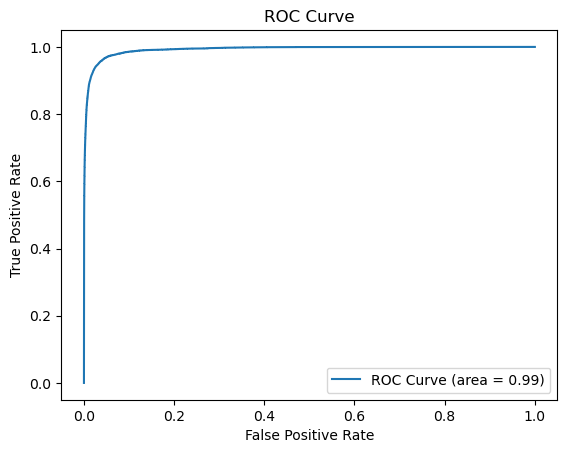

In [38]:
# ROC curve and AUC 

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Need to encode the labels to make it compatible with multiclass classification
lb = LabelBinarizer().fit(y_train)
y_test_bin = lb.transform(y_test)
y_probs = model_4.predict(X_test_scaled)
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr["total"], tpr["total"], _ = roc_curve(y_test_bin.ravel(), y_probs.ravel())
roc_auc["total"] = auc(fpr["total"], tpr["total"])
plt.plot(fpr["total"], tpr["total"], label="ROC Curve (area = {0:0.2f})".format(roc_auc["total"]))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

In [39]:
# Calculating recall, precision, and F1 score

y_preds = model_4.predict(X_test_scaled).argmax(axis=1)
r = tf.keras.metrics.Recall()
p = tf.keras.metrics.Precision()
r.update_state(y_test, y_preds)
p.update_state(y_test, y_preds)
print(f"Recall: {r.result()}")
print(f"Precision: {p.result()}")
print(f"F1 Score: {2 * r.result() * p.result() / (r.result() + p.result())}")

313/313 [==============================] - 0s 818us/step
Recall: 0.9800000190734863
Precision: 0.9851446151733398
F1 Score: 0.9825655817985535


In [26]:
# Creating a function to randomly plot 4 images and give their true and predicted labels. Also shows prediction probabilities in percent form.

import random

def four_random_images(model, images, true_labels, classes):
 

  plt.figure(figsize=(10, 10))
  for j in range(4):
    ax = plt.subplot(2, 2, j+1)
    # Set up random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 784))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image.reshape(28,28), cmap=plt.cm.binary)

    # Change color of titles depending on if prediction is right or wrong
    if pred_label == true_label:
      color="green"
    else:
      color="red"

    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color=color)
    plt.xticks([])
    plt.yticks([])

1/1 [==============================] - 0s 21ms/step


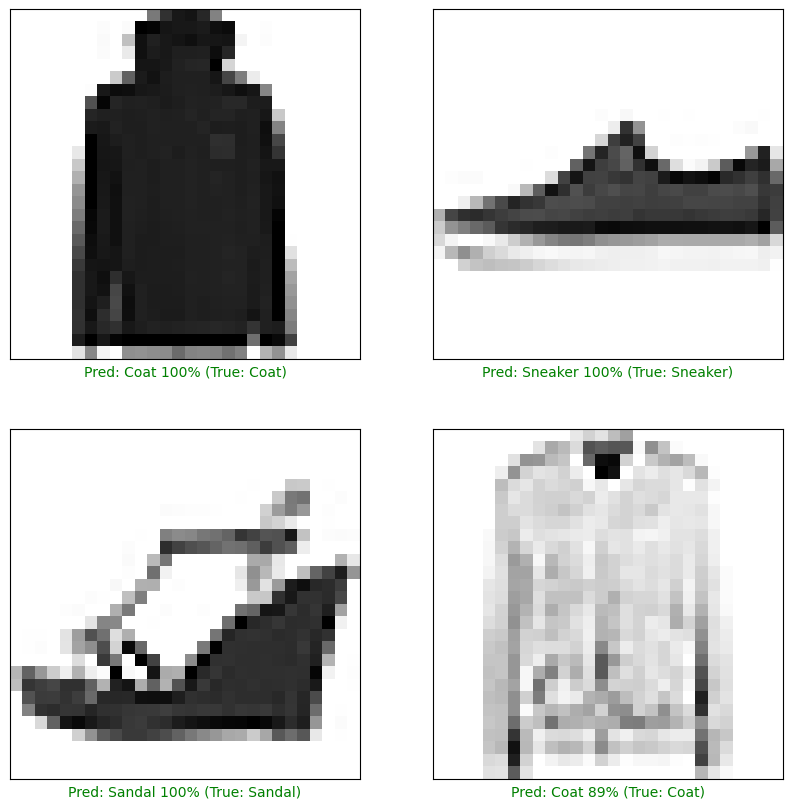

In [43]:
four_random_images(model_4, X_test_scaled, y_test, class_names)